In [17]:
#pip install pandas_datareader

In [6]:
#Importing the libraries
from pandas_datareader import data

import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Scrapping the data from wikipedia
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
new_table = table[1:]
header = table.iloc[0]
ticker_table = new_table.rename(columns=header)
ticker_table.columns=["Ticker Symbol", "Security", "SEC filings", "GICS Sector","GICS Sub Industry", "Location", "Date First added",'CLK','Founded']
ticker_table.head()

,Ticker Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date First added,CLK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008


In [8]:
#Downloading historical data for the tickers
from pandas_datareader import data
tickers = ticker_table['Ticker Symbol'].tolist()
tickers = np.array(tickers)
start_date = '2017-01-01'
end_date = '2018-10-02'
#Using pandas datareader to import panel data
panel_data = data.DataReader(tickers[0:50], 'yahoo', start_date, end_date)

In [9]:
#Retrieving the Adjusted Closing prices of the data series
adj_close = panel_data['Adj Close']
adj_close.head()

Symbols,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ANET
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,36.415054,51.917995,112.360001,109.415276,35.706703,103.480003,11.43,168.627762,9.999231,31.585239,...,136.548782,107.596230,44.811119,63.779999,37.998840,27.548414,30.185495,54.445522,40.941738,97.059998
2017-01-04,36.704132,52.650063,115.739998,109.678337,36.408356,104.139999,11.43,170.011581,9.913476,31.874975,...,136.367630,108.777016,45.207344,63.590000,38.353966,27.517582,30.469021,56.460831,40.870838,101.730003
2017-01-05,37.021187,53.049370,114.809998,108.034195,36.973591,105.910004,11.24,169.892990,9.784841,31.666733,...,137.816635,108.940216,44.999802,63.250000,38.430065,27.657520,30.336706,56.114193,40.569454,101.940002
2017-01-06,38.028313,53.066010,115.419998,109.264946,36.944351,108.300003,11.32,167.668976,10.136443,31.775381,...,137.606918,109.775414,45.018677,63.119999,38.430065,27.965857,30.280003,55.759495,39.638767,101.279999
2017-01-09,37.991024,53.415398,117.110001,108.043587,36.739704,108.570000,11.49,167.570175,9.887748,31.472057,...,136.119781,108.863426,44.716789,62.360001,38.015747,28.222006,30.979353,54.864704,39.665359,99.519997


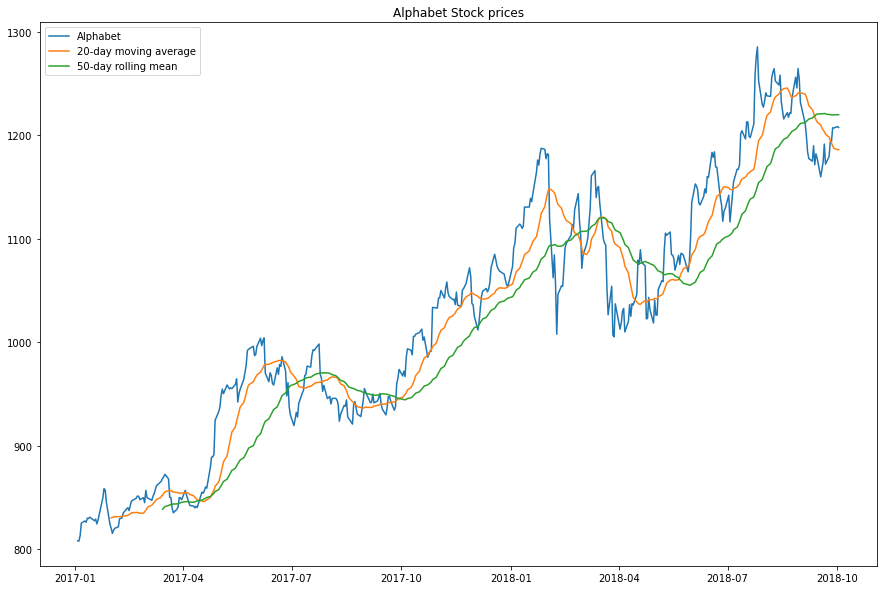

In [10]:
#Google stock analysis
googl = adj_close['GOOGL']
#Rolling means
rolling_googl_20 = googl.rolling(20).mean()
rolling_googl_50 = googl.rolling(50).mean()
#Plotting
plt.figure(figsize=(15,10))
plt.plot(googl.index, googl, label = "Alphabet")
plt.plot(rolling_googl_20.index, rolling_googl_20, label = "20-day moving average")
plt.plot(rolling_googl_50.index, rolling_googl_50, label = "50-day rolling mean")
plt.title("Alphabet Stock prices")
plt.legend()
plt.show()

In [11]:
# The first few values are Naan because there are no returns computed at that data point.
rolling_googl_20

Date
2017-01-03            NaN
2017-01-04            NaN
2017-01-05            NaN
2017-01-06            NaN
2017-01-09            NaN
                 ...     
2018-09-26    1192.603003
2018-09-27    1189.738501
2018-09-28    1187.370502
2018-10-01    1186.207001
2018-10-02    1186.023499
Name: GOOGL, Length: 441, dtype: float64

In [12]:
##Computing log returns for all the stocks
log_returns = np.log(adj_close) - np.log(adj_close.shift(1))

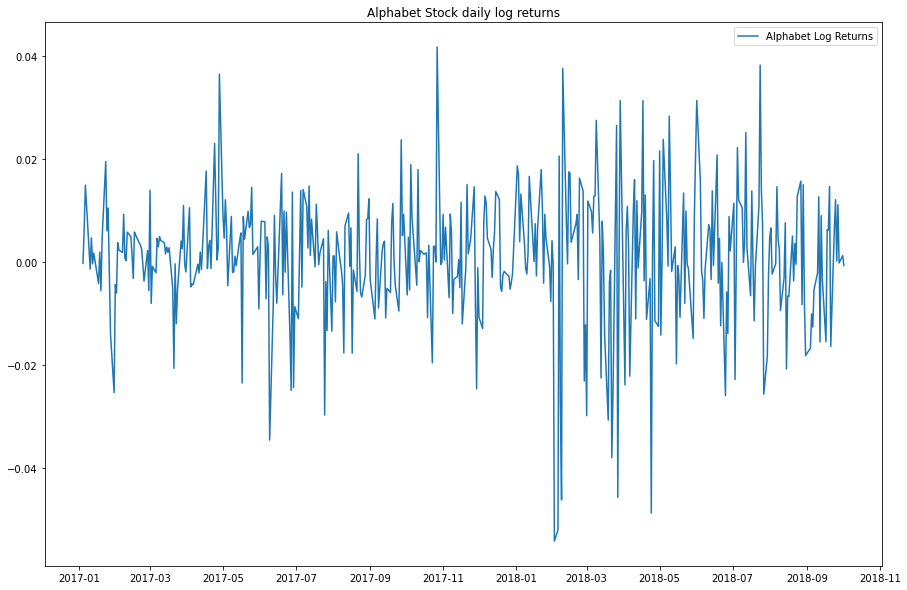

In [13]:
#Plotting the log returns for google 
googl_returns = log_returns['GOOGL']
plt.figure(figsize=(15,10))
plt.plot(googl_returns.index, googl_returns, label = "Alphabet Log Returns")
plt.title("Alphabet Stock daily log returns")
plt.legend()
plt.show()

In [14]:
#Getting the top 5 and bottom 5 performing stocks per day
top = 5
bottom = 5
#Create an empty data frame with zeros
df_top = pd.DataFrame(0, index=log_returns.index, columns=log_returns.columns)
df_bottom = pd.DataFrame(0, index=log_returns.index, columns=log_returns.columns)
#Finding the indicator of top 5 performing stocks on a given day
for index, column in log_returns.iterrows():
    df_top.loc[index, log_returns.loc[index].nlargest(top).index] = 1
    
#Finding the indicator of bottom 5 performing stocks on a given day
for index, column in log_returns.iterrows():
    df_bottom.loc[index, log_returns.loc[index].nsmallest(bottom).index] = 1

In [15]:
df_bottom

Symbols,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ANET
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2017-01-05,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-06,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2017-01-09,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-26,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2018-09-27,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2018-09-28,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [16]:
df_top

Symbols,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ANET
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2017-01-05,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-06,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-09,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-26,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-09-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-09-28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
#Computing portfolio returns
n_stocks = 10
portfolio_returns = (log_returns[df_top==1].fillna(0) - log_returns[df_bottom==1].fillna(0))/n_stocks
daily_portfolio_returns = portfolio_returns.T.sum()
daily_portfolio_returns

Date
2017-01-03    0.000000
2017-01-04    0.019524
2017-01-05    0.026699
2017-01-06    0.021023
2017-01-09    0.018469
                ...   
2018-09-26    0.020387
2018-09-27    0.016155
2018-09-28    0.019890
2018-10-01    0.020929
2018-10-02    0.030327
Length: 441, dtype: float64

In [22]:
#Computing other statistics for returns series
#Returns Mean
returns_mean = daily_portfolio_returns.mean()
returns_mean

0.022249785081213523

In [24]:
#Returns Standard Deviation
returns_sd = daily_portfolio_returns.sem()
returns_sd

0.00038219731230044844